# Food & Services Price Index Analysis
This Jupyter notebook aims to explore the data regarding food and services price index via time series analysis.

> The baseline for this dataset is the year 2017, and **not** 2005 with the [CPI Analysis](https://github.com/KouroshKSH/Hyperinflation-and-Consumer-Behavior-in-Turkey/blob/master/notebooks/CPI%20Analysis.ipynb).

# What is a Price Index?
The Price Index serves as a crucial economic indicator that measures the average change over time in the prices of goods and services within a specific market basket. By examining the Food and Services Price Index, we aim to understand the dynamics of price movements, identify underlying factors influencing the index, and explore potential implications for economic decision-making.

# Hyperinflation
Hyperinflation refers to an extreme and rapid increase in prices within an economy. It is characterized by an uncontrollable and accelerating inflation rate, typically exceeding 50% per month. Hyperinflation can have severe consequences for the price indexes, particularly in sectors such as food and services.

# Price Indecies During Hyperinflation
During hyperinflation, the prices of goods and services experience an exponential rise, often leading to a breakdown in the normal functioning of the economy. The impacts on the food and services price indexes can be profound:

## Rapid Price Increases
Hyperinflation results in an exponential increase in prices, and food and services are among the sectors most affected. The prices of basic necessities, including food items, utilities, and essential services, can skyrocket within short periods.

## Supply and Demand Imbalances
Hyperinflation can disrupt supply chains, leading to shortages and scarcities in essential goods and services. The imbalance between supply and demand exacerbates price increases and contributes to the instability of price indexes.

## Loss of Confidence
Hyperinflation erodes public confidence in the value of the currency. As prices soar, people may lose faith in the currency's ability to retain purchasing power. This loss of confidence can further fuel inflationary pressures, exacerbating the challenges faced by the food and services price indexes.

## Challenges in Tracking and Measurement
Hyperinflation presents significant challenges in accurately tracking and measuring price changes. Frequent and rapid price fluctuations, shortages, and black market activities make it difficult to capture reliable data for calculating price indexes.

## Economic Disruptions
Hyperinflation can cause significant economic disruptions, leading to reduced production, unemployment, and overall economic instability. These factors further impact the availability and affordability of food and services, making it challenging to track and analyze price indexes accurately.

<img width=75% src="https://www.al-monitor.com/sites/default/files/styles/article_header/public/2021-06/GettyImages-1058115656.jpg?h=a5ae579a&itok=TWU70oT7">

> [AL Monitor: Turkish lira remains volatile after surprise dip in inflation data](https://www.al-monitor.com/originals/2021/06/turkish-lira-remains-volatile-after-surprise-dip-inflation-data)

In summary, hyperinflation has a profound impact on price indexes, especially in sectors like food and services. It leads to rapid price increases, supply and demand imbalances, loss of confidence in the currency, measurement challenges, and broader economic disruptions. Understanding the dynamics of hyperinflation and its effects on price indexes is crucial for policymakers, economists, and individuals seeking to navigate and mitigate the consequences of such extreme inflationary environments.

# Abstract
Throughout the analysis, we employ various data exploration and visualization techniques to provide a comprehensive overview of the price index trends. We begin by loading and preprocessing the data, ensuring its integrity and converting it into a suitable format for analysis. Subsequently, we employ descriptive statistics, visualizations, and time series decomposition techniques to uncover key patterns, trends, and seasonal components within the Food and Services Price Index (FSPI).

Building upon these initial insights, we utilize advanced time series forecasting models, such as ARIMA and SARIMA, to capture and predict future price movements accurately. By evaluating the performance of these models and comparing their results, we gain a deeper understanding of the predictive capabilities and suitability of each approach for forecasting the Food and Services Price Index.

Overall, this analysis aims to provide a comprehensive understanding of the Food and Services Price Index, offering valuable insights into the dynamics of price fluctuations in these crucial sectors. By combining descriptive analysis, visualizations, and advanced forecasting techniques, we strive to support informed decision-making and contribute to a deeper understanding of economic trends and patterns in the food and services markets.

# Code
Now, we can dive into the code for this notebook, where we will analyze and visualize the dataset acquired from the [Turkish Statistical Institute](https://www.tuik.gov.tr/). The dataset that TUIK provides information for food and services price index, starting from the year 2017 and until 2023. However, it should be noted that the original dataset was not clean and needed some modifications for the purposes of our project.

<img width=75% src="https://ankahaber.net/public/upload/Haber/64391/64391_55316.jpg">

> [Turkish Statistical Institute](https://www.tuik.gov.tr/)

In [109]:
# Import cecessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
import warnings

# Data
This dataset was manually cleaned before being imported because it did not need as much (unlike the CPI data). Hence, we proceed with the rest of the code without being bothered with cleaning through code.

In [85]:
# Read the data
data = pd.read_csv('Service Producer Price Index - base 2017.csv')

In [86]:
# Show the first 10 rows
data.head(10)

,Year,Month,Accommodation and food services,Food and beverage serving services
0,2017,January,94.56,96.37
1,2017,February,94.87,96.96
2,2017,March,95.89,97.48
3,2017,April,96.95,98.23
4,2017,May,98.48,98.83
5,2017,June,101.01,99.87
6,2017,July,104.39,101.27
7,2017,August,105.18,101.17
8,2017,September,103.76,101.63
9,2017,October,102.19,102.32


In [87]:
# Describe the data
data.describe()

,Year,Accommodation and food services,Food and beverage serving services
count,75.000000,75.000000,75.000000
mean,2019.640000,201.568000,186.821733
std,1.820603,122.587454,108.998703
min,2017.000000,94.560000,96.370000
25%,2018.000000,124.995000,115.040000
50%,2020.000000,149.720000,147.890000
75%,2021.000000,226.070000,193.970000
max,2023.000000,573.770000,546.350000


# Datetime Format
For this section, the time data is converted to `datetime` format for more convenience, and also usage in later stages of the code.

In [88]:
# Convert 'Year' and 'Month' columns to datetime format
data['Time'] = pd.to_datetime(data['Year'].astype(str) + '-' + data['Month'], format='%Y-%B')

# Set the 'Time' column as the DataFrame index
data.set_index('Time', inplace=True)

# Remove the original 'Year' and 'Month' columns
data.drop(['Year', 'Month'], axis=1, inplace=True)

In [89]:
data.head(10)

,Accommodation and food services,Food and beverage serving services
Time,,
2017-01-01,94.56,96.37
2017-02-01,94.87,96.96
2017-03-01,95.89,97.48
2017-04-01,96.95,98.23
2017-05-01,98.48,98.83
2017-06-01,101.01,99.87
2017-07-01,104.39,101.27
2017-08-01,105.18,101.17
2017-09-01,103.76,101.63


# Exploratory Data Analysis
## What is EDA?
Exploratory Data Analysis (EDA) is a crucial step in the data analysis process that involves examining and understanding the characteristics, patterns, and relationships within a dataset. It helps in gaining insights, formulating hypotheses, and guiding further analysis.

<img width=75% src="https://www.purpleslate.com/wp-content/uploads/2023/03/19-3.png">

> [source](https://www.purpleslate.com/what-is-exploratory-data-analysis-and-how-does-it-help-businesses/)

## EDA on FSPI
In our project, Exploratory Data Analysis (EDA) was conducted on the Food and Services Price Index (FSPI) dataset to gain a comprehensive understanding of the data before performing time series analysis. EDA allowed us to:

- Data Familiarization: We familiarized ourselves with the structure, format, and variables present in the Food and Services Price Index dataset. We examined the columns, data types, and any missing or erroneous values specific to the food and services sector.
- Data Visualization: We created visualizations such as line plots, histograms, and box plots to explore the distribution, trends, and variability of the price index data. This helped in identifying potential outliers, seasonality, and other patterns specific to the food and services industry.
- Statistical Summaries: We calculated descriptive statistics, such as mean, median, standard deviation, and quartiles, to summarize the central tendencies and dispersion of the price index values. This provided an overview of the characteristics of the food and services price index.
- Correlation Analysis: We analyzed the correlation between the food and services price index and other relevant variables, such as time, to determine if there were any notable relationships specific to the food and services sector. This helped in understanding potential factors influencing the price index for food and services.

## Usefulness
EDA was useful in our project for several reasons specific to the analysis of food and services price index:

- Data Quality Assessment: By examining missing values, inconsistencies, or outliers, EDA helped identify data quality issues that could impact the accuracy and reliability of subsequent analyses focused on food and services.
- Pattern Identification: EDA allowed us to identify any underlying patterns, trends, or seasonality within the food and services price index data. This information is crucial for selecting appropriate modeling techniques and validating the assumptions made in time series analysis specific to the food and services industry.
- Feature Selection: EDA helped us assess the relevance and significance of additional variables present in the dataset specific to the food and services sector. This guided us in choosing the appropriate variables for our analysis and forecasting related to food and services.
- Insights and Hypothesis Generation: EDA provided us with valuable insights into the characteristics and behavior of the food and services price index. It allowed us to formulate hypotheses about the drivers of price changes in the food and services industry, potential seasonality effects, and factors influencing price fluctuations in this specific sector.


## Techniques
To conduct EDA, we employed various techniques such as data visualization using line plots and histograms, calculating summary statistics, and exploring the relationships between variables specifically related to the food and services price index. This process helped us gain a thorough understanding of the price index data, uncover important insights specific to the food and services industry, and lay the foundation for subsequent time series analysis.

# Comparing Plots
In the plot below, we compare the accommodation and food services numbers versus the food and beverage serving services in a single plot, to get a better grasp of the numbers

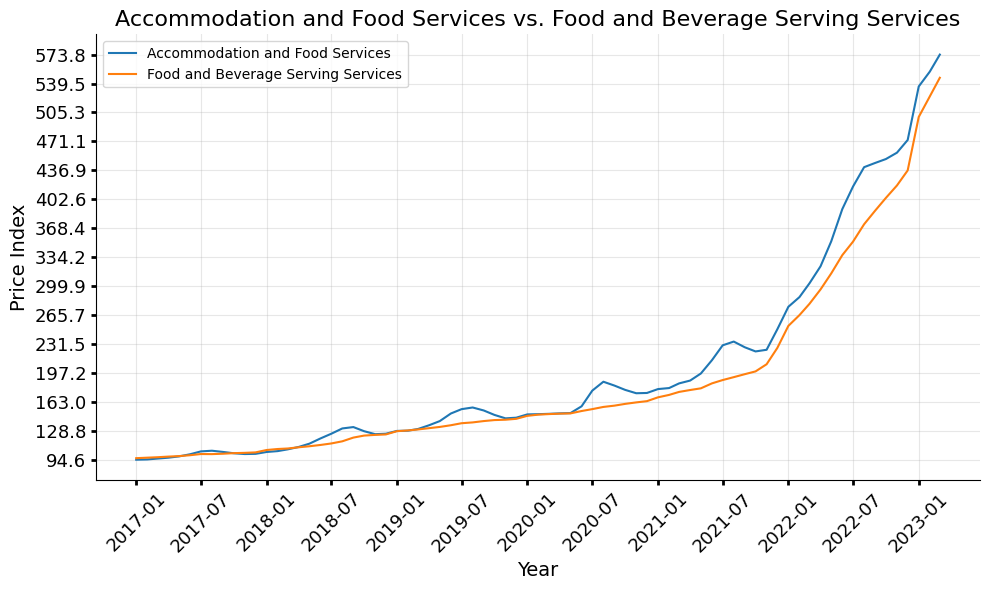

In [90]:
# Create a single figure for both plots
plt.figure(figsize=(10, 6))

plt.plot(data.index, data['Accommodation and food services'], label='Accommodation and Food Services')
plt.plot(data.index, data['Food and beverage serving services'], label='Food and Beverage Serving Services')
plt.title('Accommodation and Food Services vs. Food and Beverage Serving Services', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Price Index', fontsize=14)

# Set the values for x-axis per 6 months
years = pd.date_range(start='2017', end='2023', freq='6MS')
plt.xticks(years, [year.strftime('%Y-%m') for year in years], rotation=45, fontsize=13)

# Get the minimum and maximum values for y-axis ticks
min_price_idx = min(data['Accommodation and food services'].min(), data['Food and beverage serving services'].min())
max_price_idx = max(data['Accommodation and food services'].max(), data['Food and beverage serving services'].max())
num_ticks = 15
price_idx = np.linspace(start=min_price_idx, stop=max_price_idx, num=num_ticks)
plt.yticks(price_idx, fontsize=13)

plt.grid(alpha=0.3)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().tick_params(axis='both', which='major', width=2)
plt.tight_layout()
plt.legend()
plt.savefig("fspi_versus_eda_2017-2023")
plt.show()

# Box Plot
A box plot, also known as a box-and-whisker plot, is a statistical visualization tool that provides a summary of the distribution of a continuous variable. It displays the key characteristics of the data, including the minimum, first quartile (25th percentile), median (50th percentile), third quartile (75th percentile), and maximum. Additionally, it can show any potential outliers in the dataset.

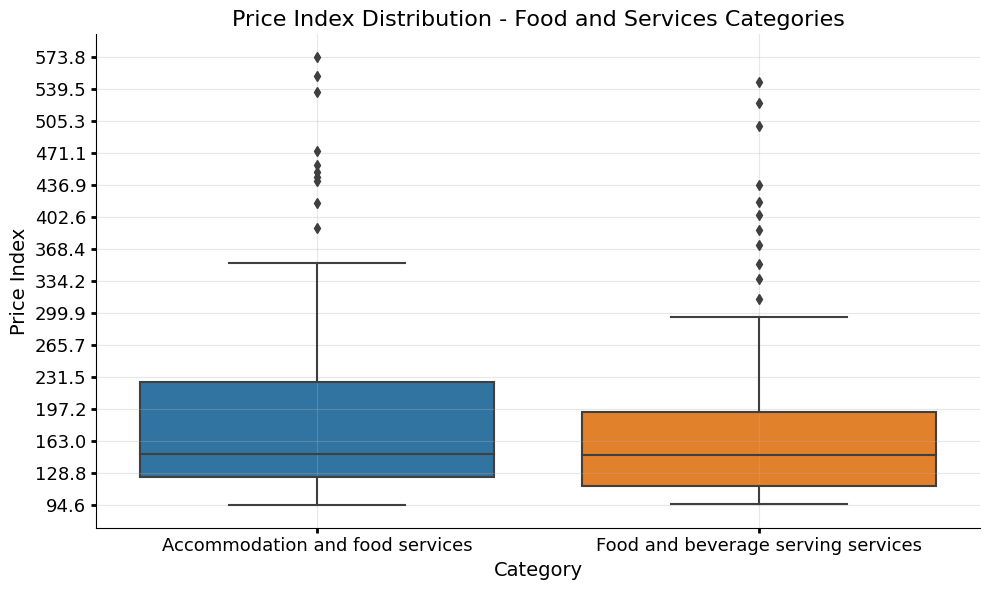

In [91]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['Accommodation and food services', 'Food and beverage serving services']])
plt.title('Price Index Distribution - Food and Services Categories', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Price Index', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(price_idx, fontsize=13)
plt.grid(alpha=0.3)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().tick_params(axis='both', which='major', width=2)
plt.tight_layout()
plt.savefig("fspi_boxplot_eda_2017-2023")
plt.show()

# Statistics
We can get a better grasp of the data via non-graphical ways as well. The easiest method would be to just print the statistics via the `.describe()` command. The code below shows the following items for "accommodation and food services" and "food and beverage serving services" separately:
1. count
2. mean
3. std
4. min
5. all 3 percentiles
6. max

In [46]:
# Calculate descriptive statistics
statistics = data.describe()

print(statistics)

       Accommodation and food services  Food and beverage serving services
count                        75.000000                           75.000000
mean                        201.568000                          186.821733
std                         122.587454                          108.998703
min                          94.560000                           96.370000
25%                         124.995000                          115.040000
50%                         149.720000                          147.890000
75%                         226.070000                          193.970000
max                         573.770000                          546.350000


# Time Series Analysis
Time Series Analysis (TSA) is a statistical method that focuses on understanding and modeling the patterns, trends, and dependencies present in the data over time, also known as *Time Series*.

## What is a Time Series?
A time series is a sequence of data points collected or recorded over time, typically at regular intervals. It represents the evolution of a variable or phenomenon over a specific time period. For instance, in this project, different datasets were used that all had regular sampling instances.

Mathematically, a time series can be denoted as:
$$
\large
Y = \{y_1, y_2, y_3, \ldots, y_t\}
$$

> Where $Y$ represents the time series, and $y_t$ represents the value of the series at time $t$.

# Effects of Covid-19
As we all know, the Covid-19 outbreak caused great problems on a global level. Many people were affected, and also industries. Therefore, we aim to understand the effects of Covid-19 on the dataset, and how different the numbers would be if it was not for this virus.

## Data Splitting
One can already tell that Covid caused massive changes in all economics indicators, and knowing so, we can proceed to measure such changes. The key step here would be to split our data for two main time periods:
1. From 2017 until September of 2019
2. From September of 2019 until 2023 (April)

Visualizations can give a better understanding of the different trends and patterns before the sudden change, and then by observing the predicable sudden changes in the price index after the pandemic, one can get a better grasp of the changes. For this task, time series analysis can give us the results needed.

In [47]:
# Split the data into training and test sets
train = data.loc[:'2019-09-01', 'Accommodation and food services']
test = data.loc['2019-09-01':, 'Accommodation and food services']

# Time Series Decomposition
The provided code performs time series decomposition using the additive model and visualizes the original data, trend, seasonality, and residuals.

## Trend
The trend component represents the long-term pattern or direction in the data. It captures the overall upward or downward movement of the series over time.

## Seasonality
The seasonality component represents the repeating patterns or cycles within the data. It reflects regular fluctuations in the series that occur with a fixed frequency, such as daily, monthly, or yearly patterns.

## Residuals
The residuals, also known as the remainder or error component, represent the fluctuations that cannot be explained by the trend or seasonality. They capture the random or irregular variations in the series that are left after removing the trend and seasonality components. Residuals are often assumed to be noise or random fluctuations around the other components.


<img width=75% src="https://www.simplilearn.com/ice9/free_resources_article_thumb/Time_Series_Analysis_In_Python_3.png">

> [SimpleLearn: Understanding time series analysis in python](https://www.simplilearn.com/tutorials/python-tutorial/time-series-analysis-in-python)

# Decomposition for Accommodation & Food Services

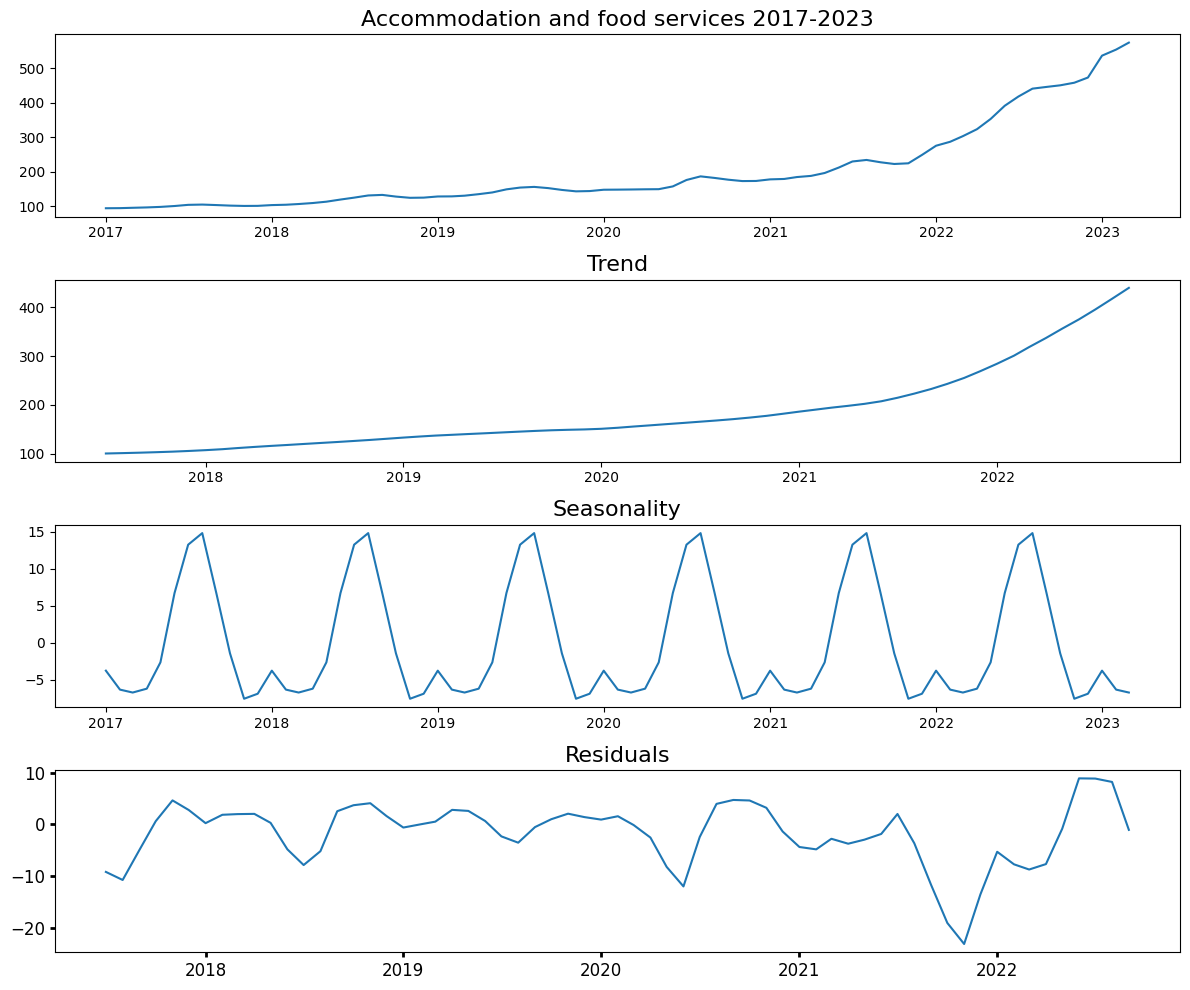

In [92]:
all_data = data.loc['2017-01-01	':, 'Accommodation and food services']
decomposition = seasonal_decompose(all_data, model='additive')

plt.figure(figsize=(12, 10))
plt.subplot(4, 1, 1)
plt.plot(all_data.index, all_data)
plt.title('Accommodation and food services 2017-2023', fontsize=16)
plt.subplot(4, 1, 2)
plt.plot(all_data.index, decomposition.trend)
plt.title('Trend', fontsize=16)
plt.subplot(4, 1, 3)
plt.plot(all_data.index, decomposition.seasonal)
plt.title('Seasonality', fontsize=16)
plt.subplot(4, 1, 4)
plt.plot(all_data.index, decomposition.resid)
plt.title('Residuals', fontsize=16)
plt.tick_params(axis='both', which='both', labelsize=12, width=2)
plt.tight_layout()
plt.savefig("fspi_accom_decomp_2017-2023")
plt.show()

# Decomposition for Food & Beverage Serving Services

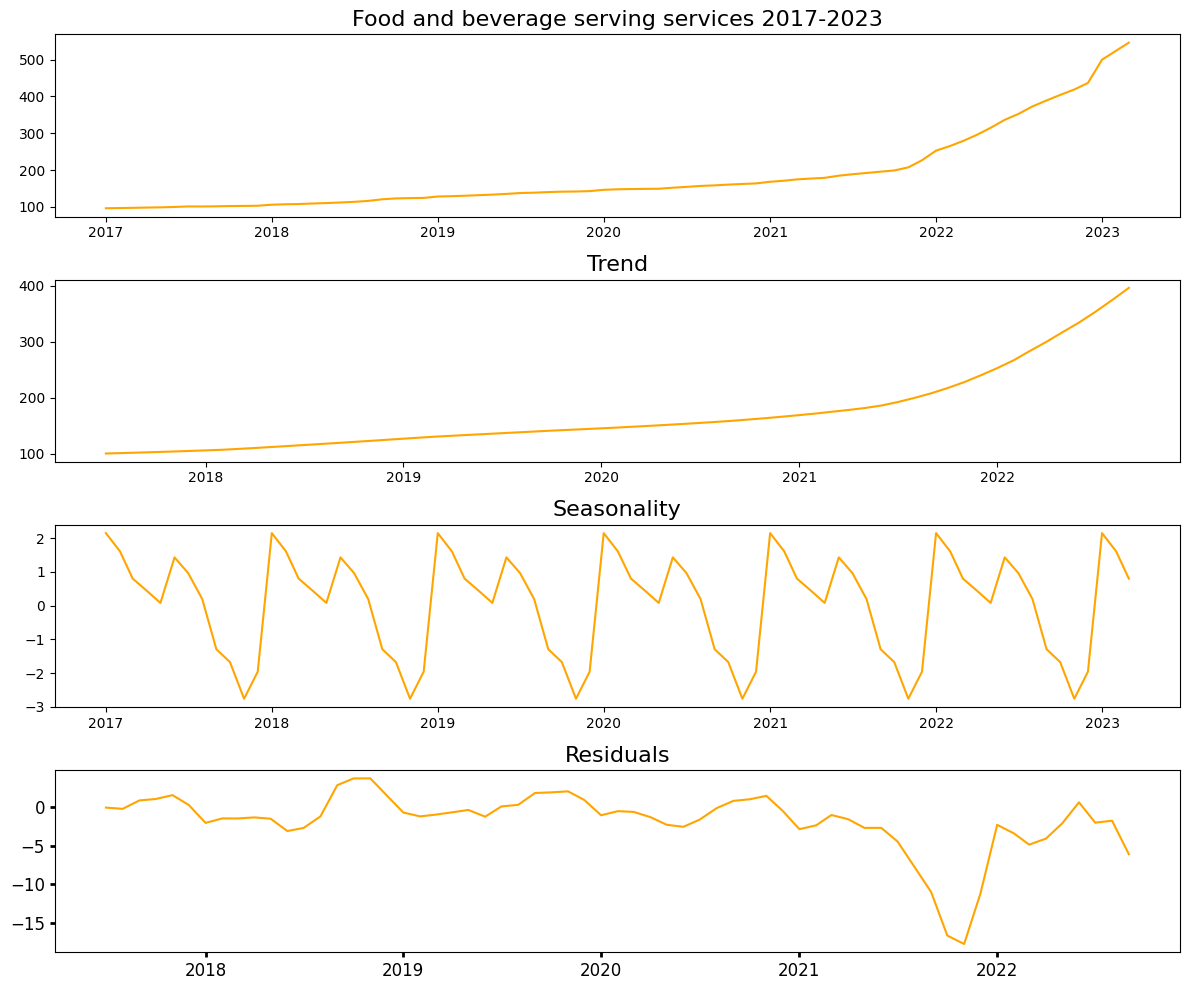

In [95]:
all_data = data.loc['2017-01-01	':, 'Food and beverage serving services']
decomposition = seasonal_decompose(all_data, model='additive')

plt.figure(figsize=(12, 10))
plt.subplot(4, 1, 1)
plt.plot(all_data.index, all_data, color='orange')
plt.title('Food and beverage serving services 2017-2023', fontsize=16)
plt.subplot(4, 1, 2)
plt.plot(all_data.index, decomposition.trend, color='orange')
plt.title('Trend', fontsize=16)
plt.subplot(4, 1, 3)
plt.plot(all_data.index, decomposition.seasonal, color='orange')
plt.title('Seasonality', fontsize=16)
plt.subplot(4, 1, 4)
plt.plot(all_data.index, decomposition.resid, color='orange')
plt.title('Residuals', fontsize=16)
plt.tick_params(axis='both', which='both', labelsize=12, width=2)
plt.tight_layout()
plt.savefig("fspi_food_beverage_decomp_2017-2023")
plt.show()

# ARIMA on Accommodation & Food Services
By using ARIMA, it is possible to capture trends, seasonality, and other temporal dynamics present in the data, providing insights into the historical and potential future behavior of the Accommodation & Food Services industry.

The application of ARIMA on the Accommodation & Food Services dataset can help uncover valuable information such as long-term trends, short-term fluctuations, and seasonal patterns in the industry's price index. This analysis can aid in making informed decisions, planning for future scenarios, and understanding the factors that drive changes in the Accommodation & Food Services sector.

## What is ARIMA?
ARIMA (AutoRegressive Integrated Moving Average) is a popular time series forecasting model that combines the concepts of autoregression (AR) and moving average (MA) along with differencing (I) to capture the temporal dependencies and patterns in a time series data.

ARIMA models are widely used for forecasting tasks as they can effectively handle time-dependent data and capture both short-term and long-term trends. The model is particularly useful when dealing with stationary or near-stationary time series, where the mean and variance remain relatively constant over time.

<img width=75% src="https://www.investopedia.com/thmb/noI1hz_KHP3tQ0eDddnQIR-rL4c=/4000x2700/filters:no_upscale():max_bytes(150000):strip_icc()/autoregressive-integrated-moving-average-arima.asp-Final-cda3fcc744084e08808bc96d87b1f496.png">

> [Investopedia](https://www.investopedia.com/terms/a/autoregressive-integrated-moving-average-arima.asp)

In our project, we have utilized ARIMA to forecast the price index of accommodation and food services in Turkey. By using ARIMA, we can generate forecasts and gain insights into future inflation trends, which can be valuable for various purposes such as economic planning, policy-making, and financial decision-making. It helps us understand the patterns and dynamics of inflation, identify potential risks, and make informed projections based on historical data.

# Using ARIMA
Adjusting the order of the ARIMA model means selecting appropriate values for the parameters `(p, d, q)` based on the characteristics of the data. Each parameter represents:

- `p` (AR): It represents the autoregressive order, which captures the relationship between the observation and a certain number of lagged observations. A higher value of `p` indicates a more complex dependency on past values.

- `d` (I): It represents the differencing order, which is the number of times the data needs to be differenced to make it stationary. Differencing removes trends or seasonality from the data.

- `q` (MA): It represents the moving average order, which captures the dependency between the observation and a residual error from a moving average model applied to lagged observations. A higher value of `q` indicates a more complex dependency on past forecast errors.

To determine the appropriate values for `(p, d, q)`, we can analyze the autocorrelation function (ACF) and partial autocorrelation function (PACF) plots of the time series. These plots provide insights into the potential values of `p` and `q`.

---

## Adjusting the Order
1. Plotting the ACF and PACF plots for the differenced time series (`train.diff().dropna()`).
2. Identify the significant lags where the autocorrelation crosses the significance boundary (shaded region). The ACF plot helps identify the `q` value, and the PACF plot helps identify the `p` value.
3. Choosing a range of values for `p` and `q` based on the significant lags.
4. Iterating through different combinations of `p` and `q`, along with a fixed value for `d`, and select the combination that minimizes a suitable evaluation metric (e.g., AIC, BIC, MSE).
5. Fitting the ARIMA model with the chosen `(p, d, q)` values.

We can adjust the `(p, d, q)` order in the `ARIMA` model instantiation based on the significant lags observed, by examining the ACF and PACF plots.

---

### What is a Signifanct Lag?
In time series analysis, a significant lag is a lag that has a noticeable correlation with the current observation. It indicates the number of lagged terms to include in the autoregressive (AR) and moving average (MA) components of the ARIMA model.

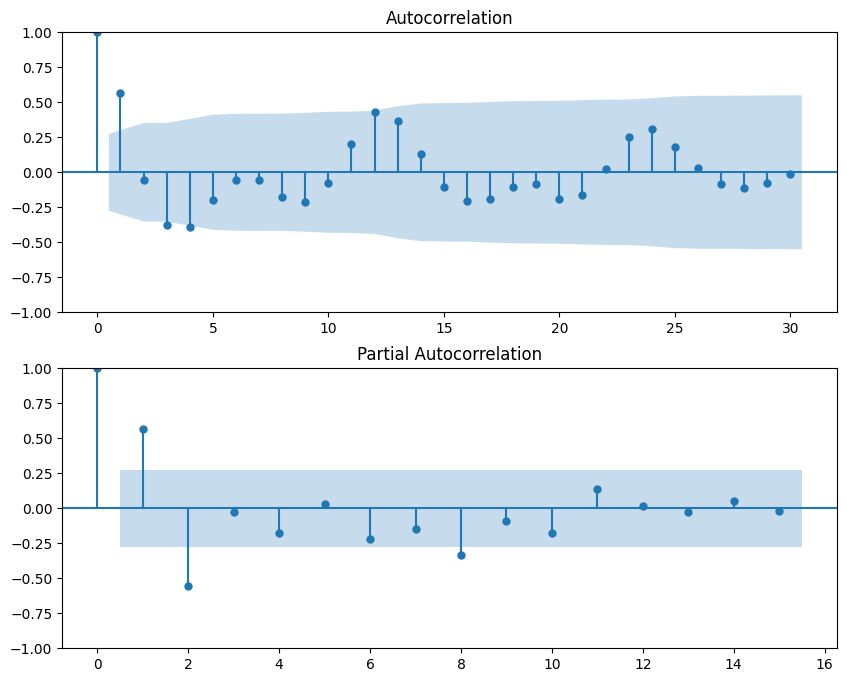

In [96]:
# Generate ACF and PACF plots
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(train.diff().dropna(), lags=30, ax=ax[0])
plot_pacf(train.diff().dropna(), lags=15, ax=ax[1]) # can't go above 15
plt.savefig("fspi_autocorr_plots.png")
plt.show()

# Visualizing ARIMA

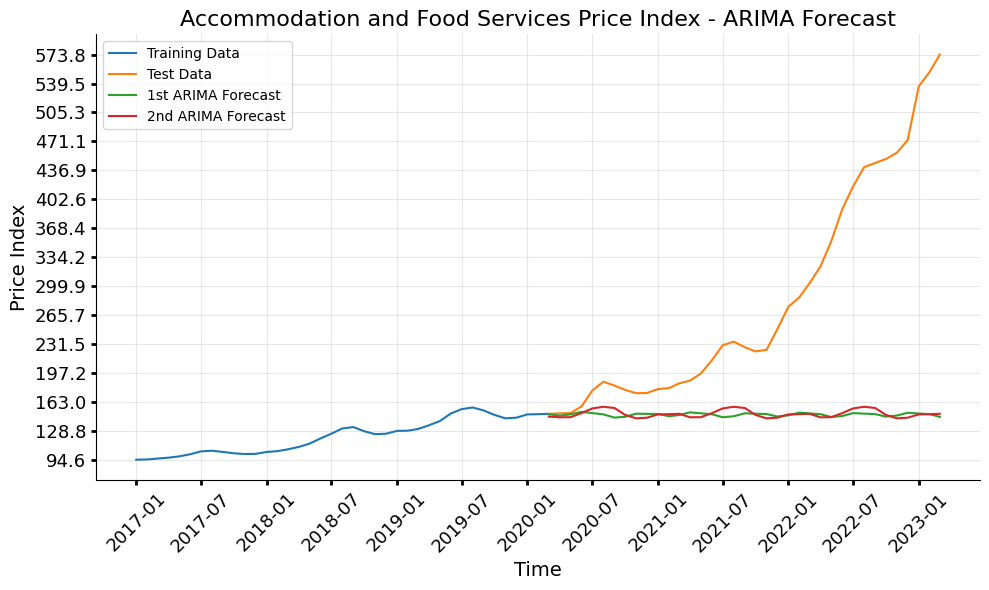

In [98]:
# Set the frequency of the data to monthly
data = data.asfreq('MS')

# Split the data into training and test sets
train = data.loc[:'2020-03-01', 'Accommodation and food services']
test = data.loc['2020-03-01':, 'Accommodation and food services']

# Create and fit the ARIMA models
model1 = ARIMA(train, seasonal_order=(1, 1, 1, 5))
arima_model1 = model1.fit()
model2 = ARIMA(train, seasonal_order=(1, 1, 1, 6))
arima_model2 = model2.fit()

# Forecast using the ARIMA model
forecast1 = arima_model1.predict(start=test.index[0], end=test.index[-1])
forecast2 = arima_model2.predict(start=test.index[0], end=test.index[-1])

# Plot the ARIMA forecast
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(forecast1.index, forecast1, label='1st ARIMA Forecast')
plt.plot(forecast2.index, forecast2, label='2nd ARIMA Forecast')
plt.title('Accommodation and Food Services Price Index - ARIMA Forecast', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Price Index', fontsize=14)
plt.legend()

years = pd.date_range(start='2017', end='2023', freq='6MS')
plt.xticks(years, [year.strftime('%Y-%m') for year in years], rotation=45, fontsize=13)

min_price_idx = data['Accommodation and food services'].min()
max_price_idx = data['Accommodation and food services'].max()
num_ticks = 15
price_idx = np.linspace(start=min_price_idx, stop=max_price_idx, num=num_ticks)
plt.yticks(price_idx, fontsize=13)

plt.grid(alpha=0.3)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().tick_params(axis='both', which='major', width=2)
plt.tight_layout()
plt.legend()
plt.tight_layout()
plt.savefig("fspi_accom_arima_2017-2023.png")
plt.show()

As one can see, both ARIMA forecasts show divergence from the actual data after September of 2019. One of the shortcomings of the forecast has to do with how little data is available for the model to be trained with. This issue will be addressed later for better results

# Forecasted & Test Values

In [99]:
print(">>>\t1st forecast")
print(forecast1.describe())
print("\n>>>\t2nd forecast")
print(forecast2.describe())
print("\n>>>\tTest Data")
print(test.describe())

>>>	1st forecast
count     37.000000
mean     147.902268
std        1.819851
min      144.365280
25%      146.253169
50%      148.376033
75%      149.235278
max      151.217360
Name: predicted_mean, dtype: float64

>>>	2nd forecast
count     37.000000
mean     148.906830
std        4.534294
min      143.480081
25%      144.872865
50%      148.141225
75%      149.661971
max      157.196497
Name: predicted_mean, dtype: float64

>>>	Test Data
count     37.000000
mean     283.315676
std      130.075801
min      148.820000
25%      179.310000
50%      227.550000
75%      391.040000
max      573.770000
Name: Accommodation and food services, dtype: float64


# Comparison Between Forecast & Test Data
## Mean Squared Error
$$\Large
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

## Mean Aboslte Error
$$\Large
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
$$

In [100]:
series1 = pd.Series(test.squeeze())
series2 = pd.Series(forecast1.squeeze())
series3 = pd.Series(forecast2.squeeze())

# Mean Squared Error (MSE)
mse1 = mean_squared_error(series1, series2)
mse2 = mean_squared_error(series1, series3)

# Mean Absolute Error (MAE)
mae1 = np.mean(np.abs(series1 - series2), axis=0)
mae2 = np.mean(np.abs(series1 - series3), axis=0)

print(">>>\tMSE of 1st forecast:", mse1)
print(">>>\tMAE of 1st forecast:", mae1)

print(">>>\tMSE of 2nd forecast:", mse2)
print(">>>\tMAE of 2nd forecast:", mae2)

>>>	MSE of 1st forecast: 34832.26335758336
>>>	MAE of 1st forecast: 135.41340719677527
>>>	MSE of 2nd forecast: 34477.15187380939
>>>	MAE of 2nd forecast: 134.40884568853318


Based on the MSE (Mean Squared Error) and MAE (Mean Absolute Error) values obtained for the forecast and test data, we can draw the following conclusions:
- With a relatively high MSE and MAE, it suggests that the forecasts have moderate levels of error and are not accurate.

- Considering that the project involves analyzing the price index of accommodation and food services over time, where the training and test data were split in September 2019, it is worth noting that data is known to be influenced by various factors, most importantly, Covid-19.

Overall, while the MSE and MAE values of both ARIMA models indicate some level of forecast error, they should be interpreted alongside domain knowledge and other evaluation metrics to assess the overall quality of the forecast and to gain a comprehensive understanding of the CPI data's behavior over time.

# SARIMA
Seasonal Autoregressive Integrated Moving Average (SARIMA) is a popular time series forecasting model that extends the capabilities of the ARIMA model to capture seasonal patterns in the data. SARIMA models are particularly useful when dealing with time series data that exhibit seasonal variations.

<img width=75% src="https://miro.medium.com/v2/resize:fit:720/0*9sAh7U-BnKdb1sB6">

> [source](https://towardsdatascience.com/time-series-forecasting-with-sarima-in-python-cda5b793977b)


## Model
In the context of forecasting the price index of the accommodation and food services, SARIMA can help capture both the long-term trends and the seasonal patterns that might exist in the data. By incorporating autoregressive (AR), differencing (I), and moving average (MA) components, SARIMA models can effectively model the dependencies and fluctuations in the time series data.

$$
\large
\text{SARIMA} \left( p,d,q \right) \left( P, D, Q \right)_{m}
$$

## More Data
For the next stage, we decided to give more data to the model to be able to come up with a better prediction. Therefore, we split the data from April of 2021, when the country enacted its first nationwide restrictions.

> [BBC: Turkey enters first full lockdown](https://www.bbc.com/news/world-europe-56912668)

# Checking Stationarity
We can perform the Augmented Dickey-Fuller Test to see if our dataset is stationary or not.

In [101]:
result = adfuller(data['Accommodation and food services'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: 1.0369963415117818
p-value: 0.9946413636206571
Critical Values:
	1%: -3.540522678829176
	5%: -2.9094272025108254
	10%: -2.5923136524453696


# Results
## ADF Statistic
The ADF statistic is 1.0369963415117818 in this case. It represents the test statistic value obtained from the ADF test. To interpret this value, we compare it to the critical values.

## P-value
The p-value associated with the ADF test is 0.9946413636206571. It represents the probability of observing a test statistic as extreme as the one calculated, assuming the null hypothesis of non-stationarity is true. A smaller p-value indicates stronger evidence against the null hypothesis. In this case, the high p-value suggests that there is a high probability that the series is non-stationary.

## Critical Values
The critical values indicate the threshold values at which one can reject the null hypothesis. The values we obtained are:
   - 1%: -3.540522678829176
   - 5%: -2.9094272025108254
   - 10%: -2.5923136524453696

# Interpretations
To interpret the results and determine stationarity:
- If the ADF statistic is less than the critical values, we can reject the null hypothesis and conclude that the data is stationary.
- If the p-value is less than the chosen significance level (e.g., 0.05), we can reject the null hypothesis and conclude that the data is stationary.

In this case, the ADF statistic is greater than the critical values, and the p-value is high (greater than 0.05), indicating that the data is likely non-stationary.

# April of 2021

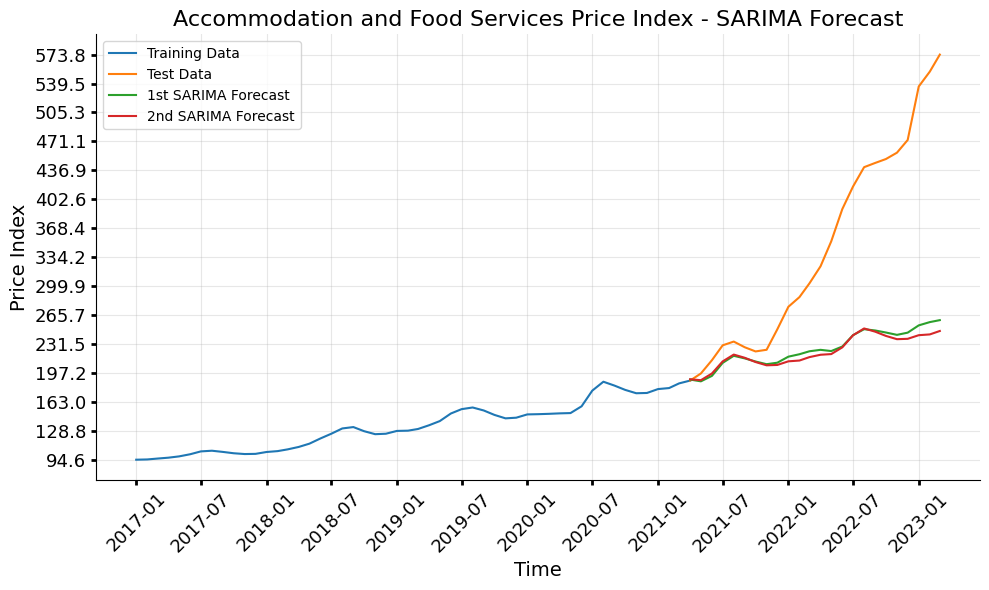

In [114]:
# Create and fit the SARIMA model with custom initial parameters
start_params = [0, 0, 0, 0, 0, 0]

# Suppress the warning messages
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")

    model1 = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 6), start_params=start_params)
    sarima_model1 = model1.fit()
    model2 = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12), start_params=start_params)
    sarima_model2 = model2.fit()

# Forecast using the SARIMA model
forecast1 = sarima_model1.predict(start=test.index[0], end=test.index[-1])
forecast2 = sarima_model2.predict(start=test.index[0], end=test.index[-1])

# Plot the SARIMA forecast
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(forecast1.index, forecast1, label='1st SARIMA Forecast')
plt.plot(forecast2.index, forecast2, label='2nd SARIMA Forecast')
plt.title('Accommodation and Food Services Price Index - SARIMA Forecast', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Price Index', fontsize=14)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().tick_params(axis='both', which='major', width=2)
years = pd.date_range(start='2017', end='2023', freq='6MS')
plt.xticks(years, [year.strftime('%Y-%m') for year in years], rotation=45, fontsize=13)
min_price_idx = data['Accommodation and food services'].min()
max_price_idx = data['Accommodation and food services'].max()
num_ticks = 15
price_idx = np.linspace(start=min_price_idx, stop=max_price_idx, num=num_ticks)
plt.yticks(price_idx, fontsize=13)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.legend()
plt.tight_layout()
plt.savefig("fspi_accom_sarima_2017-2023")
plt.show()

# Forecasted Values of SARIMA

In [115]:
print(">>>\t1st forecast")
print(forecast1.describe())
print("\n>>>\t2nd forecast")
print(forecast2.describe())
print("\n>>>\tTest Data")
print(test.describe())

>>>	1st forecast
count     24.000000
mean     225.596856
std       21.342884
min      187.269842
25%      210.366551
50%      222.953829
75%      244.890578
max      259.656814
Name: predicted_mean, dtype: float64

>>>	2nd forecast
count     24.000000
mean     222.156368
std       18.572483
min      188.600206
25%      210.652878
50%      218.808346
75%      241.184370
max      249.817707
Name: predicted_mean, dtype: float64

>>>	Test Data
count     24.000000
mean     344.400417
std      123.689847
min      188.180000
25%      229.282500
50%      313.250000
75%      446.752500
max      573.770000
Name: Accommodation and food services, dtype: float64


In [116]:
series1 = pd.Series(test.squeeze())
series2 = pd.Series(forecast1.squeeze())
series3 = pd.Series(forecast2.squeeze())

# Mean Squared Error (MSE)
mse1 = mean_squared_error(series1, series2)
mse2 = mean_squared_error(series1, series3)

# Mean Absolute Error (MAE)
mae1 = np.mean(np.abs(series1 - series2), axis=0)
mae2 = np.mean(np.abs(series1 - series3), axis=0)

print(">>>\tMSE of 1st forecast:", mse1)
print(">>>\tMAE of 1st forecast:", mae1)

print(">>>\tMSE of 2nd forecast:", mse2)
print(">>>\tMAE of 2nd forecast:", mae2)

>>>	MSE of 1st forecast: 24357.517164911198
>>>	MAE of 1st forecast: 118.90111284121356
>>>	MSE of 2nd forecast: 25887.110889044536
>>>	MAE of 2nd forecast: 122.37224782135014


# ARIMA versus SARIMA
## Comparison of Graphs and Forecasts
When comparing the graphs generated by both models, it becomes evident that SARIMA better captures the observed patterns in the price index of the accommodation and food services. The SARIMA forecast aligns closer with the actual data, capturing the overall trend as well as the seasonal variations. On the other hand, the ARIMA forecast appears to be far less accurate, showing a straight line after the split of the data and failing to capture the upward trend that should be present.

The SARIMA model takes into account both the autoregressive, differencing, and moving average components, as well as the seasonal patterns in the data. By incorporating these elements, SARIMA is able to capture the complex dynamics and fluctuations observed in the price index. This leads to improved forecast accuracy and a better representation of the underlying trends in the data.

## MSE and MAE
Upon evaluating the performance of both models, SARIMA outperformed ARIMA in terms of forecast accuracy. The mean squared error (MSE) and mean absolute error (MAE) metrics were used to assess the accuracy of the forecasts.

# Summary
This notebook focused on conducting exploratory data analysis (EDA) and performing both ARIMA and SARIMA forecasting on the Accommodation & Food Services price index dataset. The notebook followed a step-by-step approach to gain insights from the data and generate predictions using the both models.

1. Exploratory Data Analysis (EDA):
   - The notebook began with an EDA section to familiarize ourselves with the dataset.
   - Various techniques such as data visualization, statistical summaries, and correlation analysis were employed to understand the dataset's structure, trends, and relationships with other variables.
   - Key insights were derived from the EDA, including potential outliers, seasonality effects, and factors influencing price changes.

2. ARIMA Modeling and Forecasting:
   - After the EDA, the notebook proceeded to build an ARIMA model for forecasting.
   - The dataset is split into training and test sets (initially 2020), and the ARIMA model is fitted using the training data.
   - An ARIMA forecast was generated using the fitted model for the test period.
   - The ARIMA forecast was visualized alongside the training and test data to evaluate the model's performance.

3. SARIMA Modeling and Forecasting:
   - After the ARIMA modeling, the notebook proceeded to build a SARIMA model for forecasting, with the same approach.
   - It should be noted that the year 2021 was chosen was the split for training and testing for SARIMA.

4. Errors:
   - To capture the amount of difference existing between the forecasts and the original data, MAE and MSE were used.
   - A clear divergence was observed past 2021, which was not expected with the previous trend of the data.
   - SARIMA performed better than ARIMA in this scenario.

# Conclusion
The Accommodation & Food Services price index dataset was thoroughly explored and analyzed using exploratory data analysis (EDA) techniques. The EDA revealed valuable insights into the dataset, including trends, patterns, and potential factors influencing price changes in the industry. Key findings from the EDA phase helped inform subsequent modeling and forecasting efforts.

The ARIMA and SARIMA models both displayed great difference between the expected trajectory of the food and services price index, and what happened after 2021. This can be greatly attributed to the effects of Covid-19. 

In conclusion, this notebook provided a comprehensive analysis of the Accommodation & Food Services price index dataset, covering EDA, SARIMA modeling, and forecasting. The insights gained from the analysis can be valuable for industry stakeholders, policymakers, and researchers in understanding the price dynamics of the sector. The SARIMA model, despite the challenges of non-stationarity and invertibility, proved useful for generating forecasts and assisting in decision-making processes.